In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
from math import sqrt
import quandl
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# spy_df = pd.read_csv('/Users/naumanahmad/downloads/SPY.csv')
# spy_df.set_index('Date', inplace=True)

In [3]:
def get_data(ticker, start_date, end_date):
    quandl.ApiConfig.api_key = "CG7axqyftyamjMa2DPB5"
    ticker_data = quandl.get('WIKI/' + ticker, start_date = start_date, end_date = end_date)
    return ticker_data

spy_df = get_data('V', '2000-01-01', '2018-01-01')

In [4]:
spy_df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2008-03-19,59.50,69.00,55.00,56.50,177121500.0,0.0,1.0,13.902298,16.121993,12.850864,13.201342,708486000.0
2008-03-20,58.47,65.00,57.50,64.35,49746300.0,0.0,1.0,13.661636,15.187384,13.434994,15.035511,198985200.0
2008-03-24,67.24,67.70,59.00,59.73,37391600.0,0.0,1.0,15.710765,15.818245,13.785472,13.956038,149566400.0
2008-03-25,60.63,64.25,59.82,63.25,21773000.0,0.0,1.0,14.166325,15.012145,13.977067,14.778493,87092000.0
2008-03-26,62.50,64.48,61.57,63.96,10777900.0,0.0,1.0,14.603254,15.065885,14.385958,14.944386,43111600.0


In [5]:
# Params
n = 1

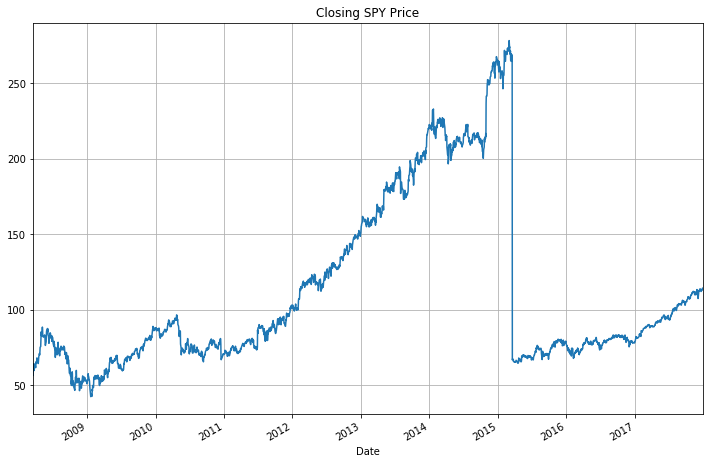

In [6]:
spy_df['Close'].plot(figsize=(12, 8), title="Closing SPY Price", grid=True)

In [7]:
spy_df['Return'] = spy_df['Close'].pct_change()

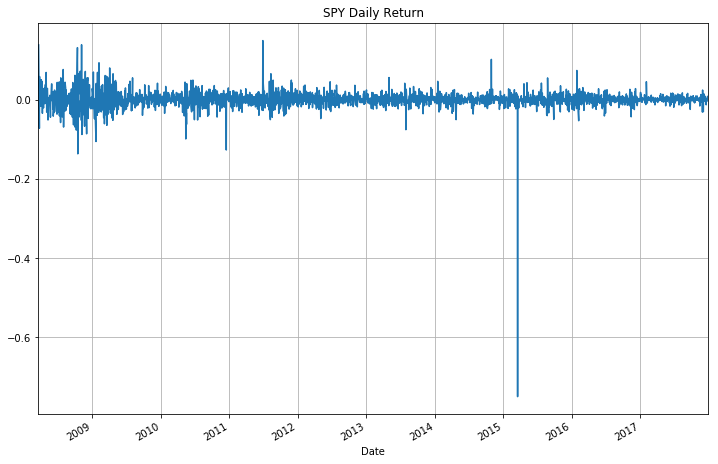

In [8]:
spy_df['Return'].plot(figsize=(12, 8), title="SPY Daily Return", grid=True)

In [9]:
spy_df['Cummulative Return'] = 100 * (1 + spy_df['Return']).cumprod() - 1

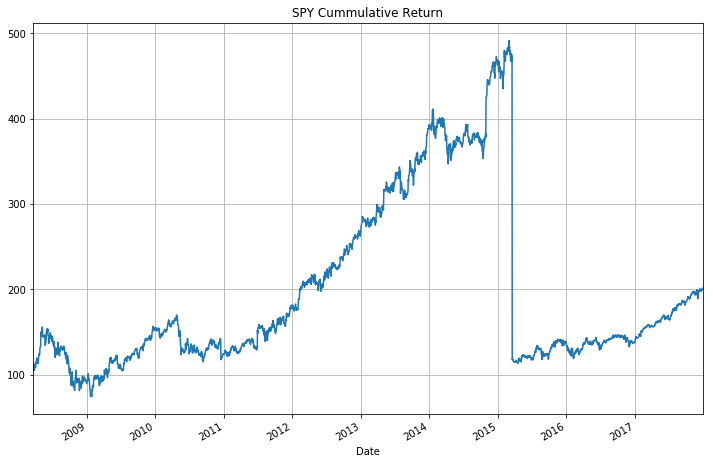

In [10]:
spy_df['Cummulative Return'].plot(figsize=(12, 8), title="SPY Cummulative Return", grid=True)

In [11]:
count  = 0
spy_df['Bearish'] = 0
for index, row in spy_df.iterrows():
    if row['Return'] < 0:
        count += 1
    elif row['Return'] >= 0:
        count = 0
    
    if count == n:
        spy_df.at[index, 'Bearish'] = 1
        count = 0

In [12]:
spy_df['Bearish'].value_counts()

0    1316
1    1148
Name: Bearish, dtype: int64

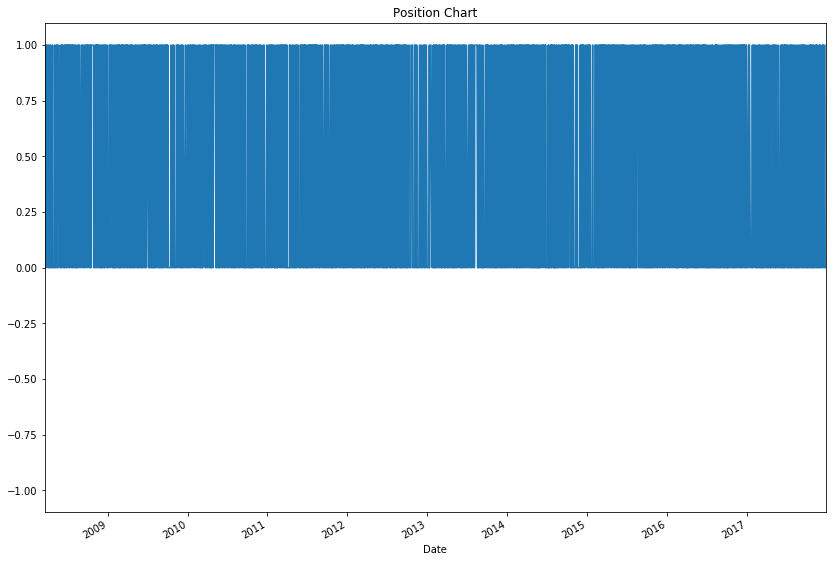

In [13]:
spy_df['Bearish'].plot(lw=1.5,ylim=[-1.1,1.1], figsize=(14, 10), title="Position Chart")

In [14]:
spy_df['Strategy'] = spy_df['Return'] * spy_df['Bearish'].shift(1)
 
# Equity Curve For Strategy
spy_df['Strategy Equity'] = 10000 * (spy_df['Strategy'].cumsum() + 1)
spy_df['Buy And Hold Equity'] = 10000 * (spy_df['Return'].cumsum() + 1)

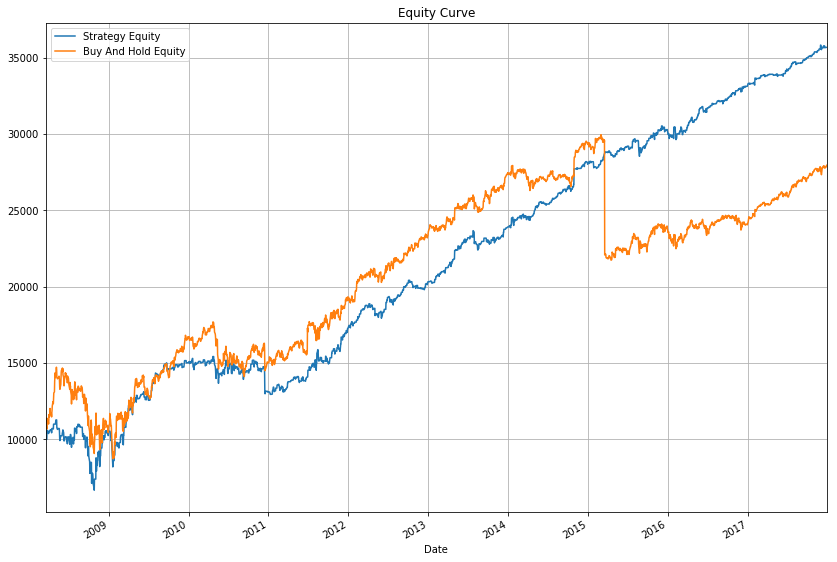

In [15]:
spy_df[['Strategy Equity', 'Buy And Hold Equity']].plot(grid=True, figsize=(14, 10), title="Equity Curve")

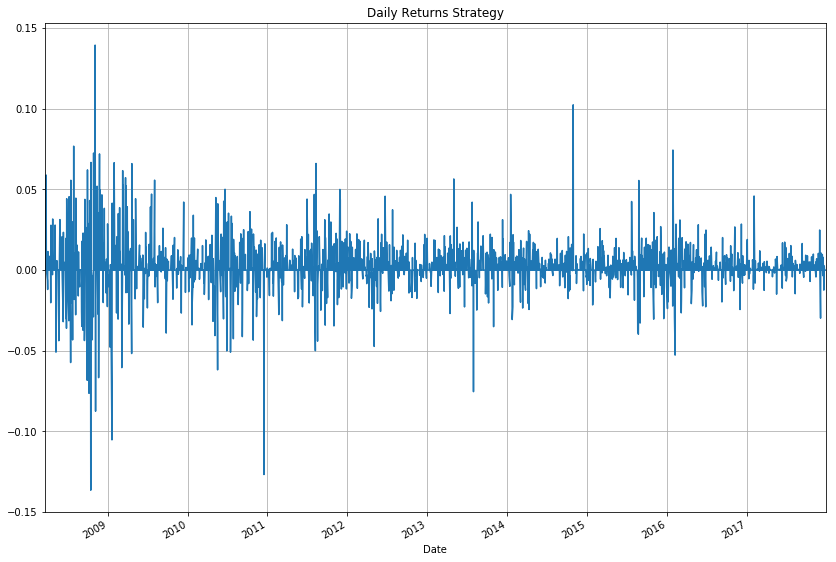

In [16]:
spy_df['Strategy'].plot(grid=True, figsize=(14,10),title='Daily Returns Strategy')

In [17]:
sharpe_strategy = sqrt(260) * (spy_df['Strategy'].mean() / spy_df['Strategy'].std())
sharpe_strategy

1.1873708506606473